In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [12]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [16]:
x = df.iloc[:,0:-1]


In [18]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [24]:
y = df.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrian_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [29]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [43]:
model= Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


In [44]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [45]:
history = model.fit(xtrian_scaled,ytrain,epochs=100,validation_split=.2)

Epoch 1/100
10/10 [==============================] - 2s 37ms/step - loss: 0.4171 - val_loss: 0.2924
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1760 - val_loss: 0.1312
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0912 - val_loss: 0.0936
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0769 - val_loss: 0.0892
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0763 - val_loss: 0.0854
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0721 - val_loss: 0.0810
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0685 - val_loss: 0.0781
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0654 - val_loss: 0.0751
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0.0719
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0603 - val_loss: 0.0687
Ep

10/10 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 83/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 84/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 85/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 86/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 87/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 88/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 89/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 90/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 91/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 92

In [46]:
y_pred = model.predict(xtest_scaled)
from sklearn.metrics import accuracy_score,r2_score
r2_score(ytest,y_pred)

4/4 [==============================] - 0s 3ms/step


0.7542638725954101

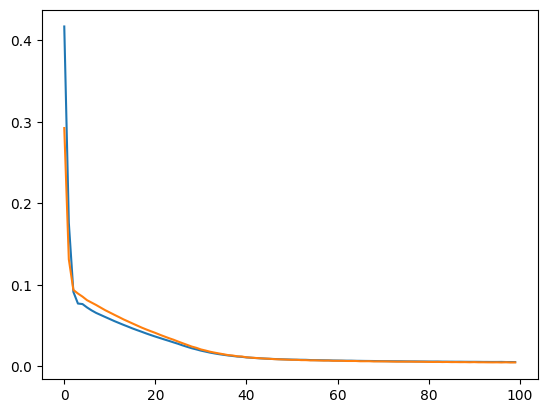

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])